**Дипломная работа по теме:
“Анализ региональных продаж компании в США (поиск инсайтов, составление рекомендаций стейкхолдерам)”**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
df = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Sales Orders Sheet')
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n


1. **`OrderNumber`** - Номер заказа
2. **`Sales Channel`** - Канал продаж
3. **`WarehouseCode`** - Код склада, откуда осуществляется отгрузка
4. **`ProcuredDate`** - Дата закупки товара (у поставщика)
5. **`OrderDate`** - Дата оформления заказа
6. **`ShipDate`** - Дата отправки заказа
7. **`DeliveryDate`** - Дата доставки заказа
8. **`CurrencyCode`** - Код валюты
9. **`_SalesTeamID`** - Идентификатор команды продаж
10. **`_CustomerID`** - Идентификатор клиента
11. **`_StoreID`** - Идентификатор магазина
12. **`_ProductID`** - Идентификатор продукта
13. **`Order Quantity`** - Количество заказанных единиц
14. **`Discount Applied`** - Применённая скидка
15. **`Unit Price`** - Цена за единицу товара
16. **`Unit Cost`** - Себестоимость единицы товара

In [ ]:
df_customer = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Customers Sheet')
df_customer.head()

,_CustomerID,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _CustomerID     50 non-null     int64 
 1   Customer Names  50 non-null     object
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


1. **` _CustomerID`** - Идентификатор клиента
2. **`Customer Names`** - Наименование клиента

In [ ]:
df_products = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Products Sheet')
df_products.head()

,_ProductID,Product Name
0,1,Cookware
1,2,Photo Frames
2,3,Table Lamps
3,4,Serveware
4,5,Bathroom Furniture


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _ProductID    47 non-null     int64 
 1   Product Name  47 non-null     object
dtypes: int64(1), object(1)
memory usage: 884.0+ bytes


1. **` _ProductID`** - Идентификатор продукта
2. **` Product Name`** - Наименование продукта

In [ ]:
df_salesTeam = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Sales Team Sheet')
df_salesTeam.head()

,_SalesTeamID,Sales Team,Region
0,1,Adam Hernandez,Northeast
1,2,Keith Griffin,Northeast
2,3,Jerry Green,West
3,4,Chris Armstrong,Northeast
4,5,Stephen Payne,South


In [ ]:
df_salesTeam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _SalesTeamID  28 non-null     int64 
 1   Sales Team    28 non-null     object
 2   Region        28 non-null     object
dtypes: int64(1), object(2)
memory usage: 804.0+ bytes


1. **`_SalesTeamID`** - Идентификатор команды продаж
2. **` Product Name`** - Наименование команды продаж
3. **`Region`** - Регион

In [ ]:
df_regions_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Regions Sheet')
df_regions_sheet.head()

,StateCode,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_regions_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StateCode  48 non-null     object
 1   State      48 non-null     object
 2   Region     48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


1. **`StateCode`** - Код штата
2. **`State `** - Название штата
3. **`Region `** - Регион

In [ ]:
df_store_locations_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name = 'Store Locations Sheet')
df_store_locations_sheet.head()

,_StoreID,City Name,County,StateCode,State,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,1,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
1,2,Huntsville,Limestone County/Madison County,AL,Alabama,City,34.69901,-86.67298,256,190582,78554,48775,552604579,3452021,America/Chicago
2,3,Mobile,Mobile County,AL,Alabama,City,30.69436,-88.04305,251,194288,76170,38776,361044263,105325210,America/Chicago
3,4,Montgomery,Montgomery County,AL,Alabama,City,32.36681,-86.29997,334,200602,79866,42927,413985435,4411954,America/Chicago
4,5,Little Rock,Pulaski County,AR,Arkansas,City,34.74648,-92.28959,501,197992,79902,46085,307398785,6758644,America/Chicago


In [ ]:
df_store_locations_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    int64  
 1   City Name         367 non-null    object 
 2   County            367 non-null    object 
 3   StateCode         367 non-null    object 
 4   State             367 non-null    object 
 5   Type              367 non-null    object 
 6   Latitude          367 non-null    float64
 7   Longitude         367 non-null    float64
 8   AreaCode          367 non-null    int64  
 9   Population        367 non-null    int64  
 10  Household Income  367 non-null    int64  
 11  Median Income     367 non-null    int64  
 12  Land Area         367 non-null    int64  
 13  Water Area        367 non-null    int64  
 14  Time Zone         367 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 43.1+ KB


1. **`_StoreID`** - Идентификатор магазина
1. **`City Name`** - Название населенного пункта
1. **`County`** - Округ
1. **`StateCode`** - Код штата
1. **`State`** - Штат
1. **`Type`** - Тип населенного пункта
1. **`Latitude `** - Широта
1. **`Longitude`** - Долгота
1. **`AreaCode`** - Телефонный код региона  
1. **`Population`** - Население
1. **`Household Income`** - Доход домохозяйств
1. **`Median Income`** - Медианный доход  
1. **`Land Area`** - Площадь суши  
1. **`Water Area`** - Площадь водоемов  
1. **`Time Zone`** - Часовой пояс

In [ ]:
#объединяем данные в единую таблицу для дальнейшего анализа
df_merged = pd.merge(df, df_customer, on='_CustomerID', how='left')
df_merged1 = pd.merge(df_merged, df_salesTeam, on='_SalesTeamID', how='left')
df_merged2 = pd.merge(df_merged1, df_products, on='_ProductID', how='left')
df_merged2.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,Sales Team,Region,Product Name
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,Rochester Ltd,Joshua Bennett,Northeast,Dining Furniture
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,Pacific Ltd,Paul Holmes,Midwest,Wreaths
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,"3LAB, Ltd",Samuel Fowler,Midwest,Stemware
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,"Fenwal, Corp",Carlos Miller,West,Accessories
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,Bare,Joe Price,Northeast,Candles


In [ ]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

1. **`OrderNumber`** - Номер заказа
2. **`Sales Channel`** - Канал продаж
3. **`WarehouseCode`** - Код склада, откуда осуществляется отгрузка
4. **`ProcuredDate`** - Дата закупки товара (у поставщика)
5. **`OrderDate`** - Дата оформления заказа
6. **`ShipDate`** - Дата отправки заказа
7. **`DeliveryDate`** - Дата доставки заказа
8. **`CurrencyCode`** - Код валюты
9. **`_SalesTeamID`** - Идентификатор команды продаж
10. **`_CustomerID`** - Идентификатор клиента
11. **`_StoreID`** - Идентификатор магазина
12. **`_ProductID`** - Идентификатор продукта
13. **`Order Quantity`** - Количество заказанных единиц
14. **`Discount Applied`** - Применённая скидка
15. **`Unit Price`** - Цена за единицу товара
16. **`Unit Cost`** - Себестоимость единицы товара
17. **`Customer Names`** - Наименование клиента       
18. **`Sales Team`** - Наименование команды        
19. **`Region`** - Регион       
20. **`Product Name`** - Наименование продукта      

In [ ]:
#удаляем столбец, содержащий один и тот же параметр для всех строк
df_merged2 = df_merged2.drop(columns=['CurrencyCode'])

#в столбцах, информация в которых имеет признак категориальных данных, меняем тип данных на category для облегчения группировок в дальнейшем
cat_cols = [ 'Sales Channel', 'WarehouseCode', '_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 'Customer Names', 'Sales Team', 'Region', 'Product Name']
df_merged2[cat_cols] = df_merged2[cat_cols].astype('category')

#заводим столбец для расчета финальной цены за единицу товара, после применения скидок, столбец "Выручка", столбец "Маржа", столбец "%Маржи" и столбец "MonthYear" для группировок
df_merged2['Final Unit Price'] = df_merged2['Unit Price'] * (1 - df['Discount Applied'])
df_merged2['Revenue'] = df_merged2['Order Quantity'] * df_merged2['Final Unit Price']
df_merged2['Margin'] = (df_merged2['Revenue'] - (df_merged2['Order Quantity'] * df_merged2['Unit Cost']))
df_merged2['%Margin'] = df_merged2['Margin']/df_merged2['Revenue']
df_merged2['MonthYear'] = df_merged2['OrderDate'].dt.to_period('M')


In [ ]:
#считаем базовые статистики для числовых столбцов
df_merged2[['Order Quantity', 'OrderDate', 'Discount Applied','Unit Cost', 'Unit Price']].describe()

,Order Quantity,OrderDate,Discount Applied,Unit Cost,Unit Price
count,7991.000000,7991,7991.000000,7991.000000,7991.000000
mean,4.525341,2019-09-15 11:01:09.828557312,0.114394,1431.911054,2284.536504
min,1.000000,2018-05-31 00:00:00,0.050000,68.675000,167.500000
25%,3.000000,2019-01-16 12:00:00,0.050000,606.115500,1031.800000
50%,5.000000,2019-09-15 00:00:00,0.075000,1080.576000,1849.200000
75%,7.000000,2020-05-12 00:00:00,0.150000,2040.250500,3611.300000
max,8.000000,2020-12-30 00:00:00,0.400000,5498.556000,6566.000000
std,2.312631,NaN,0.085570,1112.413043,1673.096364


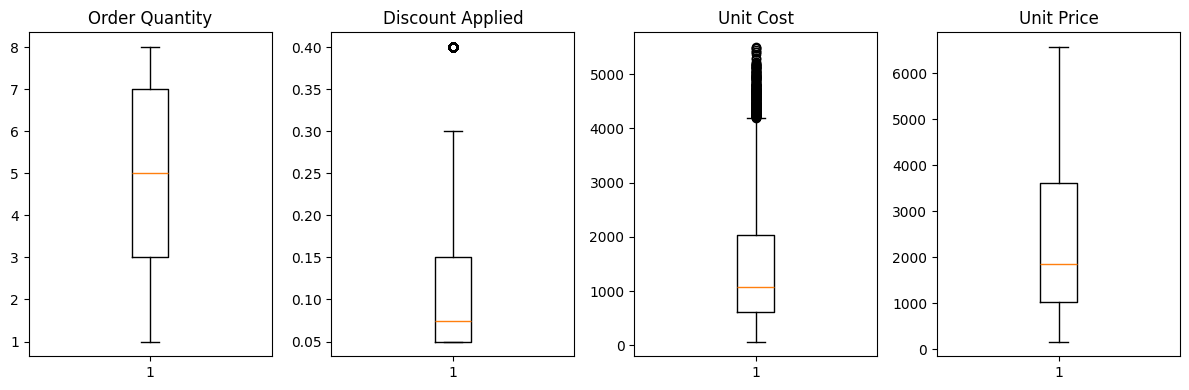

In [ ]:
#рисуем боксплоты для числовых столбцов
columns_to_plot = [ 'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price']
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(12, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

***Значительных выбросов и аномалий в данных нет.***

In [ ]:
#проверяем категориальные данные
for column in cat_cols:
  unique_values = df_merged2[column].unique()
  print(f"Уникальные значения в столбце {column}: {unique_values}")
  print("\n")

Уникальные значения в столбце Sales Channel: ['In-Store', 'Online', 'Distributor', 'Wholesale']
Categories (4, object): ['Distributor', 'In-Store', 'Online', 'Wholesale']


Уникальные значения в столбце WarehouseCode: ['WARE-UHY1004', 'WARE-NMK1003', 'WARE-PUJ1005', 'WARE-XYS1001', 'WARE-MKL1006', 'WARE-NBV1002']
Categories (6, object): ['WARE-MKL1006', 'WARE-NBV1002', 'WARE-NMK1003', 'WARE-PUJ1005',
                         'WARE-UHY1004', 'WARE-XYS1001']


Уникальные значения в столбце _SalesTeamID: [6, 14, 21, 28, 22, ..., 15, 16, 27, 3, 1]
Length: 28
Categories (28, int64): [1, 2, 3, 4, ..., 25, 26, 27, 28]


Уникальные значения в столбце _CustomerID: [15, 20, 16, 48, 49, ..., 37, 41, 31, 45, 39]
Length: 50
Categories (50, int64): [1, 2, 3, 4, ..., 47, 48, 49, 50]


Уникальные значения в столбце _StoreID: [259, 196, 213, 107, 111, ..., 67, 348, 254, 197, 34]
Length: 367
Categories (367, int64): [1, 2, 3, 4, ..., 364, 365, 366, 367]


Уникальные значения в столбце _ProductID: [12, 2

***Выбросов в категориальных данных нет, очистка данных не тебуется***

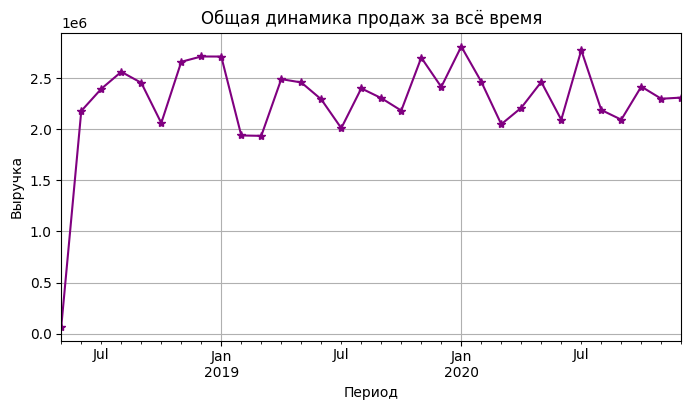

In [ ]:
# Общая динамика продаж по времени
sales_over_time = df_merged2.groupby('MonthYear')['Revenue'].sum()

plt.figure(figsize=(8,4))
sales_over_time.plot(kind='line', marker='*', color='purple')
plt.title('Общая динамика продаж за всё время')
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

- Наличие сезонных колебаний. Продажи демонстрируют выраженные пики в середине и начале каждого года, что может свидетельствовать о сезонной активности, промо-кампаниях или цикличности спроса.
- Стабильный рост с колебаниями. Несмотря на флуктуации, общая динамика выручки остаётся положительной, без резких спадов, что говорит о стабильности бизнес-модели.


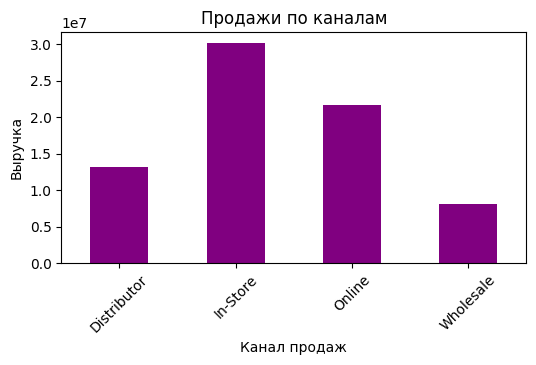

In [ ]:
# Продажи по каналам
sales_by_channel = df_merged2.groupby('Sales Channel', observed=True)['Revenue'].sum()

plt.figure(figsize=(6,3))
sales_by_channel.plot(kind='bar', color='purple')
plt.title('Продажи по каналам')
plt.xlabel('Канал продаж')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

- Лидирующий канал — In-Store. Продажи через физические магазины значительно превышают остальные каналы. Это ключевой драйвер выручки.
-  Онлайн-продажи на втором месте. Онлайн-канал показывает сильные результаты, что подтверждает его стратегическую важность и потенциал для масштабирования.
-  Distributor и Wholesale — отстающие. Каналы дистрибуции и оптовых продаж генерируют существенно меньшую выручку. Возможно, они используются как вспомогательные или имеют ограниченный охват.
Рекомендации для стейкхолдеров:
- Усилить онлайн-канал. Учитывая его высокий потенциал, стоит инвестировать в рекламу и персонализацию, чтобы увеличить конверсию и средний чек.
- Оптимизировать In-Store продажи. Раз In-Store — основной источник дохода, важно поддерживать высокий уровень обслуживания, проводить локальные акции и анализировать поведение покупателей.
- Ревизия Distributor и Wholesale. Провести аудит этих каналов: возможно, стоит изменить стратегию, пересмотреть партнёрства или интегрировать их с другими каналами.
- Сравнить маржинальность по каналам. Выручка — это хорошо, но важно понять, какой канал приносит больше прибыли.
-  Тестировать новые каналы. Если текущие каналы исчерпали потенциал, можно протестировать новые форматы: маркетплейсы, мобильные приложения и т.д.


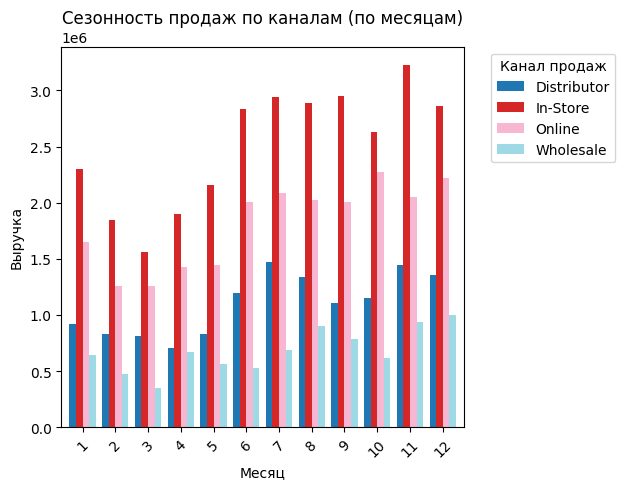

In [ ]:
#заводим столбец "Month" и анализируем сезонность по каналам
df_merged2['Month'] = df_merged2['OrderDate'].dt.month
seasonality_by_channel = (df_merged2.groupby(['Month', 'Sales Channel'], observed=True)['Revenue'].sum().unstack(fill_value=0))
seasonality_by_channel.plot(kind='bar', stacked=False, colormap='tab20', width=0.8)
plt.title('Сезонность продаж по каналам (по месяцам)')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(title='Канал продаж', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- In-Store — стабильный лидер. Канал In-Store демонстрирует высокую выручку во все месяцы, особенно в июне, июле и декабре. Это основной источник дохода с выраженной сезонной динамикой.
- Online — растущий тренд с пиками в октябре и декабре. Онлайн-продажи показывают рост в течение года, достигая пиков в осенне-зимний период. Это может быть связано с праздничным спросом и усилением цифровых кампаний.
- Distributor — стабильный, но низкий вклад. Продажи через дистрибьюторов остаются на одном уровне весь год, без выраженной сезонности. Это может указывать на ограниченную гибкость канала или фиксированные контракты.
- Wholesale — наименее активный канал. Оптовые продажи остаются на низком уровне, с незначительными колебаниями. Вероятно, канал используется точечно или имеет ограниченное покрытие.


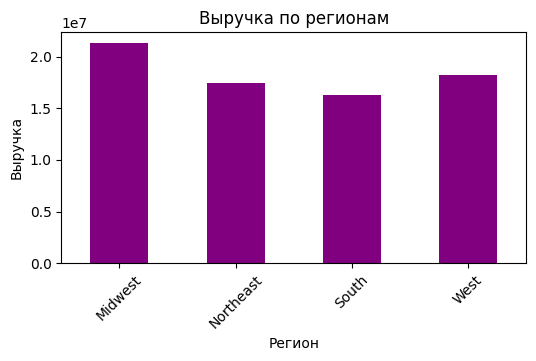

In [ ]:
#выручка по регионам
sales_by_region = df_merged2.groupby('Region', observed=True)['Revenue'].sum()

plt.figure(figsize=(6,3))
sales_by_region.plot(kind='bar', color='purple')
plt.title('Выручка по регионам')
plt.xlabel('Регион')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

Все регионы показывают стабильные значения, что может свидетельствовать о зрелости рынка и устойчивости спроса.

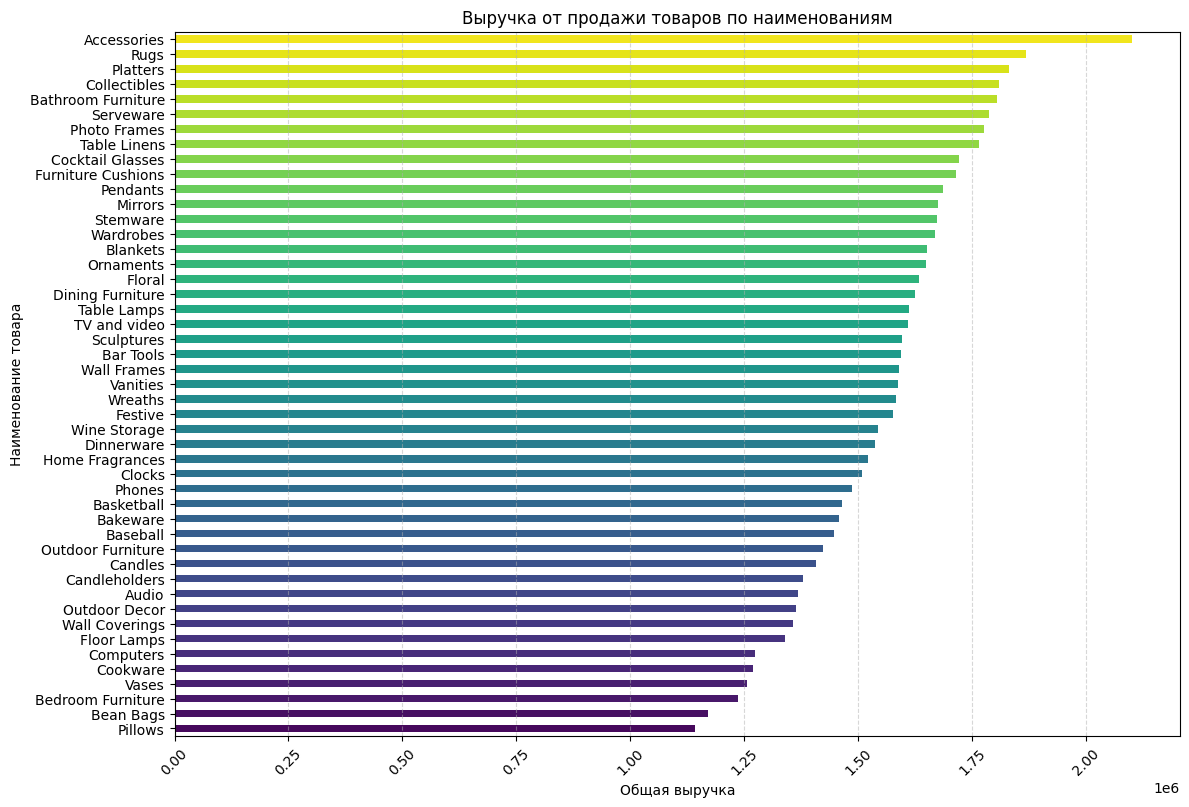

In [ ]:
product_sales = (df_merged2.groupby('Product Name', observed=True)['Revenue'].sum().sort_values(ascending=True))
colors = sns.color_palette('viridis', n_colors=len(product_sales))
plt.figure(figsize=(12, 8))
product_sales.plot(kind='barh', color=colors)

plt.title('Выручка от продажи товаров по наименованиям')
plt.xlabel('Общая выручка')
plt.ylabel('Наименование товара')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

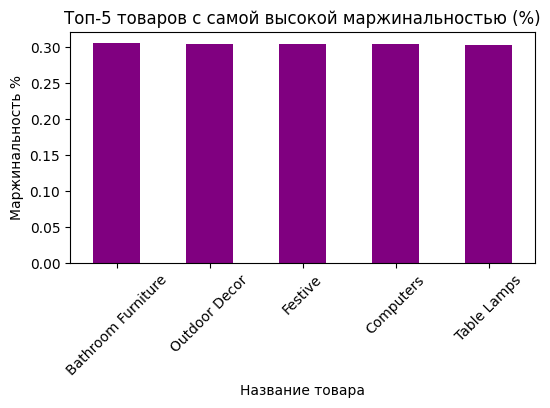

In [ ]:
# Топ-5 товаров по маржинальности продажи
highest_margin_products = (df_merged2.groupby('Product Name', observed=True)['%Margin'].mean().sort_values(ascending=False).head(5))
plt.figure(figsize=(6,3))
highest_margin_products.plot(kind='bar', color='purple')
plt.title('Топ-5 товаров с самой высокой маржинальностью (%)')
plt.ylabel('Маржинальность %')
plt.xlabel('Название товара')
plt.xticks(rotation=45)
plt.show()

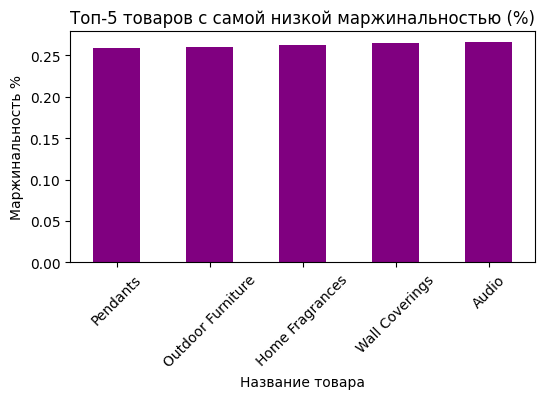

In [ ]:
#выводим топ-5 продуктов с самой низкой маржинальностью
lowest_margin_products = (df_merged2.groupby('Product Name', observed=True)['%Margin'].mean().sort_values(ascending=True).head(5))
plt.figure(figsize=(6, 3))
lowest_margin_products.plot(kind='bar', color='purple')
plt.title('Топ-5 товаров с самой низкой маржинальностью (%)')
plt.ylabel('Маржинальность %')
plt.xlabel('Название товара')
plt.xticks(rotation=45)
plt.show()

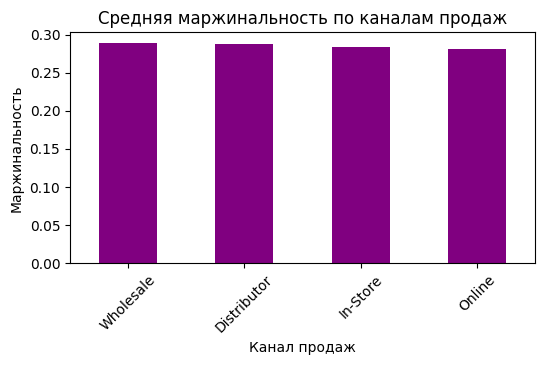

In [ ]:
channel_margin = (df_merged2.groupby('Sales Channel', observed=True)['%Margin'].mean().sort_values(ascending=False))

plt.figure(figsize=(6, 3))
channel_margin.plot(kind='bar', color='purple')
plt.title('Средняя маржинальность по каналам продаж')
plt.ylabel('Маржинальность')
plt.xlabel('Канал продаж')
plt.xticks(rotation=45)
plt.show()

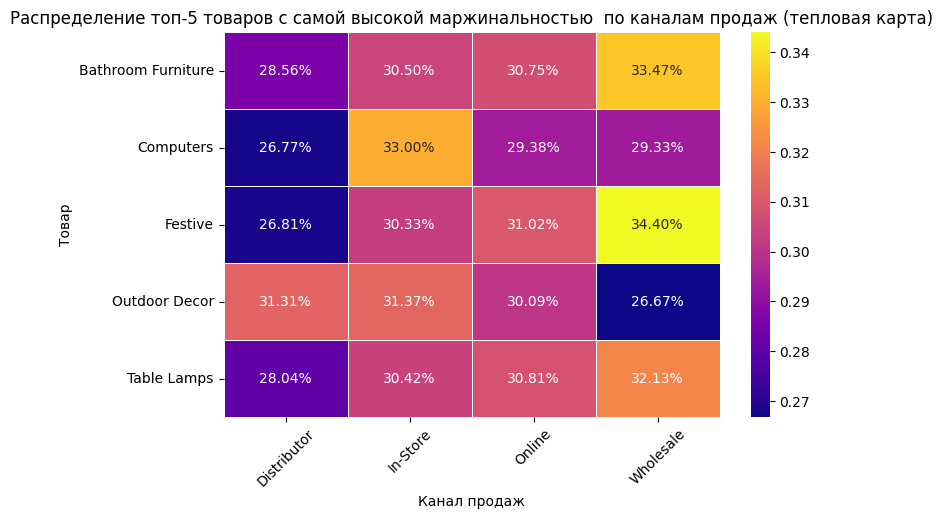

In [ ]:
#топ-5 товаров по самой высокой маржинальности  по каналам продаж (тепловая карта)
heatmap_data = (df_merged2[df_merged2['Product Name'].isin(highest_margin_products.index)].groupby(['Product Name', 'Sales Channel'], observed=True)['%Margin'].mean().unstack(fill_value=0))
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap='plasma', linewidths=0.5)

plt.title('Распределение топ-5 товаров с самой высокой маржинальностью  по каналам продаж (тепловая карта)')
plt.xlabel('Канал продаж')
plt.ylabel('Товар')
plt.xticks(rotation=45)
plt.show()

 - Оптовый канал (Wholesale) работает лучше всего для товаров категорий  Bathroom, Festive и Table Lamps, но слаб для Outdoor Decor и Computers.
- Розничный канал (In-Store) –прибылен для всех категорий товаров из Топ-5.
- Distributor почти всегда уступает остальным каналам.
- Online даёт средние показатели.


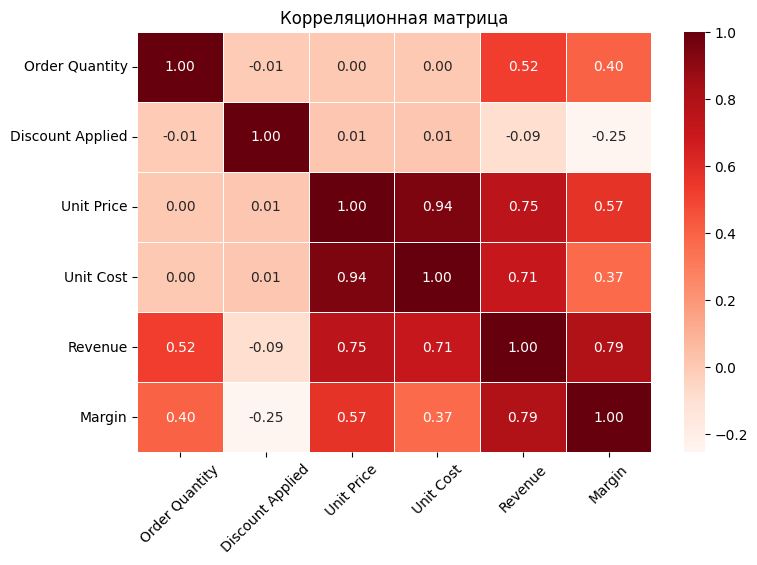

In [ ]:
# тепловая карта корреляций
num_cols = ['Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost', 'Revenue', 'Margin']
corr = df_merged2[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- Высокие цены и объем заказов обеспечивают рост выручки и маржинальности
 - Скидки не стимулируют рост выручки и вредят марже.
 - Стоимость и цена сильно взаимосвязаны, значит ключ в управлении ценовой политикой и издержками.


**Выводы:**

*  *Сезонность и рост*: продажи демонстрируют ярко выраженные сезонные колебания, при этом общая динамика выручки остаётся устойчиво положительной, без резких спадов.

*  *Каналы продаж*: наибольший доход формируется через In-Store, при этом Online активно развивается и имеет высокий потенциал, тогда как Distributor и Wholesale приносят меньшую выручку.

*  *Маржинальность и ценообразование*: рост выручки и маржинальности обеспечивают высокие цены и крупные заказы, тогда как чрезмерные скидки снижают прибыльность.